In [88]:
using DataFrames,PythonPlot,StatsBase,Random,Distributions,CSV
PythonPlot.svg(true)
include("model.jl")

FIG_PATH = "/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/Finite Lineages Plos Journal/paper/figures"

"/Users/elevien/Dropbox (Dartmouth College)/Apps/Overleaf/Finite Lineages Plos Journal/paper/figures"

In [89]:
d = 2
A = [-10.0 0.0; 0.0 -1.0]
Γ = [0.05 0.0; 0.0 0.1]
B = [-0.4 0.0; 0.0 0.1]
u = [1.0,0.0]
v = [0.0,1.0]
params = (A,B,u,v,Γ)
init = [0.0, 0.1, 0.0, 0.0]
dt = 0.01
T =50
df = make_sim_df(init, params, dt, T);


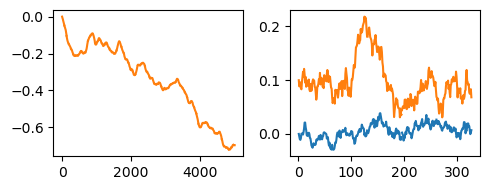

In [90]:
fig,axs = subplots(figsize=(5,2),ncols=2)

ax = axs[0]
for i in unique(df.cell)
    d = df[df.cell .== i,:]
    #ax.plot(d.time,exp.(d.Z + log(2)*d.θ),"C0")
    ax.plot(d.time,d.z,"C1")   
end
#ax.set_ylim([-0.5,3.5])

ax = axs[1]
#ax.plot(df.time,df.y)
for i in unique(df.cell)[1:5]
    d = df[df.cell .== i,:]
    ax.plot(d.time,d.x1,"C0")
    ax.plot(d.time,d.x2,"C1")   
end

tight_layout()
fig

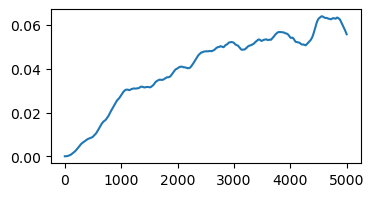

In [91]:
fig,ax = subplots(figsize=(4,2))
v = var(hcat([make_sim_df(init, params, dt, T).z for i in 1:100]...),dims=2);
ax.plot(v)
fig

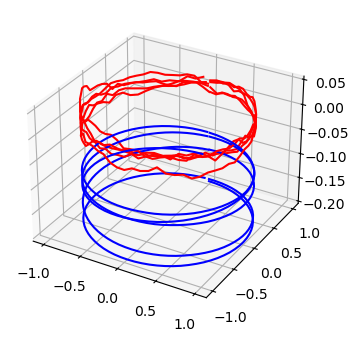

In [100]:
fig = figure(figsize=(4,4))
ax = fig.add_subplot(111, projection="3d")  # Correct way to set 3D projection
for i in unique(df.cell)[10:14]
    d = df[df.cell .== i,:]
    ax.plot(sin.(2pi*d.θ),cos.(2pi*d.θ),d.z,"b-",alpha=1)
    ax.plot(sin.(2pi*d.θ),cos.(2pi*d.θ),d.x1,"r-",alpha=1)
    #ax.plot(d.time,d.θ,"C1")   
end

fig

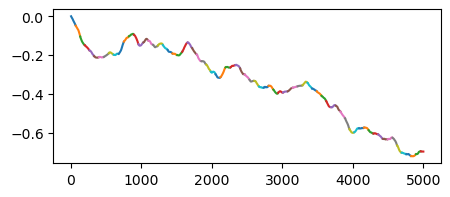

In [93]:
fig,ax = subplots(figsize=(5,2))

for i in unique(df.cell)
    d = df[df.cell .== i,:]
    ax.plot(d.time,d.z,"-",alpha=1)
    #ax.plot(d.time,d.θ,"C1")   
end

fig

# Misc

In [ ]:
function make_sim_df(z0, params, dt, T)

    kx,ky,CxZ,CyZ,Cxθ,Cyθ,Dx,Dy = params
    # Initialize variables
    x, y, Z, θ = z0
    cell = 0.0
    times = 0:dt:T

    # Storage for results
    results = [[x, y, Z, θ, cell]]
    for t in times
        x, y, Z, θ, cell = results[end]
        # Compute derivatives
        Z = Z + (x - log(2) * y)*dt
        θ = θ + (1/log(2)  + y)*dt  # Update Theta
        #[x,y] .= [x,y] .+  A * [x, y, Y, θ] *dt
        x = x - kx*x *dt +  CxZ*Z*dt + Cxθ*θ*dt + rand(Normal(0,sqrt(Dx*dt)))
        y = y - ky*y *dt +  CyZ*Z*dt + Cyθ*θ*dt + rand(Normal(0,sqrt(Dy*dt)))

        # Handle Theta reset
        if θ ≥ 1
            θ = 0
            cell += 1
            push!(results, [x, y, Z, 0, cell])
        else
            push!(results, [x, y, Z, θ, cell])
        end
    end
    df = DataFrame(hcat(results...)', [:x, :y, :Z, :θ, :cell])
    df.time = 1:length(df.x)
    return df
end